In [23]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import csv
import mediapipe as mp

##### Hyperparameter

In [24]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils
width = 640
height = 480
# kích thước của open Cv vốn mặc định rồi
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

True

In [25]:
def mediapipe_detection(image, model):
    # từ image, model dự đoán trả về kết quả (định dạng mặc định) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [27]:
def update_mpresult(res,results):
    c = 0
    if results.pose_landmarks:
        for p in results.pose_landmarks.landmark:
            p.x = res[c][0]
            p.y = res[c][1]
            c+=1
    else:
        for _ in range(33):
            c+=1
    if results.left_hand_landmarks:
        for p in results.left_hand_landmarks.landmark:
            p.x = res[c][0]
            p.y = res[c][1]
            c+=1
    else:
        for _ in range(21):
            c+=1
    if results.right_hand_landmarks:
        for p in results.right_hand_landmarks.landmark:
            p.x = res[c][0]
            p.y = res[c][1]
            c+=1
    else:
        for _ in range(21):
            c+=1
    return results

def normalize_keypoint(res,img=None):
    #normalize keypoint
    x1,y1,x2,y2 = res[11][0]*width,res[11][1]*height,res[12][0]*width,res[12][1]*height
    try:
        cv2.circle(img,(int(x1),int(y1)),4,(0,255,255),-1)
        cv2.circle(img,(int(x2),int(y2)),4,(0,255,255),-1)
    except:
        # print("No img found")
        pass
    dis = np.sqrt((x1-x2)**2+(y1-y2)**2)
    x_cen = (res[11][0]+res[12][0])/2
    y_cen = (res[11][1]+res[12][1])/2
    vector = [0.5-x_cen,0.5-y_cen]
    scale = (200*width/640)/dis
    for i in range(len(res)):
        if res[i][0]==0 and res[i][1]==0:
            continue
        res[i][0] = vector[0]+res[i][0]
        res[i][1] = vector[1]+res[i][1]
        res[i][0] = 0.5+(res[i][0]-0.5)*scale
        res[i][1] = 0.5+(res[i][1]-0.5)*scale
    return res

def extract_keypoint(results):
    res = []
    if results.pose_landmarks:
        for p in results.pose_landmarks.landmark:
            res.append(np.array([p.x,p.y,p.z,p.visibility]))
    else:
        for _ in range(33):
            res.append(np.array([0,0,0,0]))
    if results.left_hand_landmarks:
        for p in results.left_hand_landmarks.landmark:
            res.append(np.array([p.x,p.y,p.z]))
    else:
        for _ in range(21):
            res.append(np.array([0,0,0]))
    if results.right_hand_landmarks:
        for p in results.right_hand_landmarks.landmark:
            res.append(np.array([p.x,p.y,p.z]))
    else:
        for _ in range(21):
            res.append(np.array([0,0,0]))
    return res
    
def extract_keypoints_flatten(result,img = None):
    #đây là hàm chính thức
    res = extract_keypoint(result)
    res = normalize_keypoint(res,img)
    update_mpresult(res,result)
    return np.concatenate([x for x in res])

def numpy_to_filecsv(data,filename):
    with open(filename,"w",newline="") as csvfile:
        writer = csv.writer(csvfile,delimiter=",")
        writer.writerows(data.tolist())

def filecsv_to_numpy(filename,data):
    pass

True
411.1635208129883 104.32281494140625 354.6506595611572 378.19281578063965
(258,)


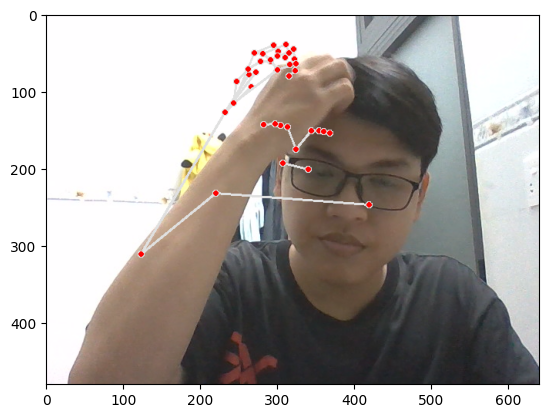

In [28]:
# testing mediapipe in a frame
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     ret, frame = cap.read()
#     print(ret)
#     frame,result = mediapipe_detection(frame,holistic)
#     res = extract_keypoints_flatten(result)
#     draw_landmarks(frame,result)
#     frame = cv2.flip(frame,1)
#     cap.release()
#     img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     print(res.shape)
#     cv2.destroyAllWindows()

In [29]:

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


#### Mặc kệ đoạn code ở trên, bắt đầu thu từ đây

- Điều chỉnh lựa chọn folder thu:
    - Lỗi lỏ của python nên điền số tạm nhé
    - Chạy 2 cell bên dưới để biết nên điền số nào
- Khi cửa sổ hiện lên, bắt đầu thu theo quy tắc là:
    - Chữ starting collect sẽ đơ trong 1.5s, vào tư thế chuẩn bị thu
    - Quá trình thu diễn ra trong 30 frame, điều chỉnh một động tác sao cho nó khớp đúng 30 frame
    - Nhấn q để huỷ quá trình thu


In [30]:

DATA_PATH = os.path.join('data') 
with open("group_tu.txt","r",encoding='utf-8') as ip:
    all_actions = [x.split("\n")[0].strip() for x in ip.readlines()]
all_actions = np.array(all_actions)
start = 0 # bắt đầu thu từ Buổi chiều
end = 0 # Thu hết buổi chiều thì dừng
no_sequences = 60 #số video cho một nhãn
sequence_length = 30 # số frame cho một video

In [32]:
s = ""
for i,j in enumerate(all_actions):
    s += f"{i}. {j}   "
    if i%5==4:
        print(s)
        s=""

0. Buổi chiều   1. Ban ngày   2. Ban đêm   3. Buổi trưa   4. Buổi sáng   
5. Buổi tối   6. Bố   7. Chị   8. Cười   9. Cảm ơn   
10. Khóc   11. Học tập   12. Cơm   13. Cô giáo   14. Mẹ   
15. Ngồi   16. Quét   17. Thầy giáo   18. Sách   19. Phim truyện   
20. Thầy cô   21. Phim hoạt hình   22. Thổi   23. Truyện   24. Xin chào   
25. Ăn   26. Viết   27. Vỗ tay   28. Xem   29. Xin lỗi   
30. Đi học   31. Đi   32. Vẽ   33. Anh hai   34. Nhặt rau   
35. Kéo (đồ vật)   36. Em trai   37. Em gái   38. Đứng nghiêm   39. Đọc sách   


In [31]:
def collected_actions(x,y):
    #hàm để chọn tiện ra một số label để thu, để khi dừng đang thu giữa chừng thu lại cho tiện
    #quay từ label X đến hết label Y
    get = False
    res = []
    for i,name in enumerate(all_actions):
        if (i==x):
            get = True
        if get:
            res.append(name)
        if (i==y):
            break
    return res

In [37]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    stop = False
    actions = collected_actions(start,end) 
    print(actions)
    for action in actions:
        if stop: break
        folder_path = os.path.join(DATA_PATH,action)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        for sequence in range(no_sequences):
            if stop: break
            #lặp trên từng mẫu, từng video
            #với mỗi sequence, output ra 1 file csv tại data/action/sequence
            file_path = os.path.join(folder_path,str(sequence)+".csv")
            if os.path.exists(file_path):
                continue
            seq_list = []
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                res = extract_keypoints_flatten(results)
                draw_landmarks(image, results)
                image = cv2.flip(image,1)
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (10,10), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1, cv2.LINE_AA)
                    print("'Collecting frames for {} Video Number {}'.format(action, sequence)")
                    cv2.imshow('OpenCV Feed', image)
                    for i in range(150):
                        if cv2.waitKey(10) & 0xFF == ord('q'):
                            stop = True
                            break
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), 
                                (30,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                seq_list.append(res)
                
                if frame_num== sequence_length-1 and stop == False:
                    numpy_to_filecsv(np.array(seq_list),file_path)
                    seq_list = []

                # Khi bấm Q, sẽ quay nốt video rồi dừng
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    stop = True
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

['Buổi chiều', 'Ban ngày']
434.10972595214844 274.31514739990234 225.9276294708252 205.9457302093506
416.4999771118164 244.2084503173828 206.74272537231445 205.9892749786377
408.75606536865234 235.2968406677246 199.86150741577148 205.34708976745605
407.61119842529297 233.3095932006836 199.25461292266846 205.05128860473633
408.33003997802734 234.44507598876953 199.40394401550293 204.8873233795166
408.2740020751953 233.68951797485352 199.6488904953003 205.8053684234619
408.01551818847656 234.48238372802734 198.27711582183838 204.12534713745117
407.51678466796875 234.3862533569336 197.2875738143921 203.41238021850586
407.53257751464844 234.90934371948242 197.24789142608643 203.2115077972412
407.71095275878906 235.47988891601562 196.9548511505127 203.15391540527344
407.72525787353516 235.52074432373047 196.7667531967163 203.1798219680786
406.98951721191406 235.06505966186523 197.0876169204712 203.32004070281982
407.0842742919922 234.81792449951172 197.4213409423828 204.18976306915283


C:\Users\admin\AppData\Local\Temp\ipykernel_17008\1120723110.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  scale = (200*width/640)/dis


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
